<a href="https://colab.research.google.com/github/Vaycold/Python_ML/blob/main/Clustering/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%20%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal
 - Clustering의 다양한 알고리즘
 - 시각화 및 차이점

## Data load & Preprocessing

In [1]:
# importing module
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 컬럼명 재 할당
columns_name_list = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
iris_df.columns = columns_name_list
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [4]:
# 딕셔너리 방법으로도 가능함.

columns_replace_dict = {
    k:v for k,v in zip(iris.feature_names, columns_name_list)
}
iris_df.rename(columns_replace_dict, axis='columns', inplace=True)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# target을 추가해보자.
iris_df['target'] = iris.target

In [6]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# target의 종류를 확인해보자.
iris_df.target.unique()

array([0, 1, 2])

In [8]:
# 결측값 확인해보자
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

## 데이터 시각화

In [9]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [10]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
import plotly.express as px

# scatter plot 생성
fig = px.scatter(iris_df, x = 'sepal_length', y='sepal_width')

# 그래프 사이즈 조정
fig.update_layout(width = 600, height=500)

fig.show()


In [ ]:
# target은 색깔을 넣어 확인해보자

fig = px.scatter(iris_df, x = 'sepal_length', y='sepal_width', color = 'target')
fig.update_layout(width = 600, height=500)
fig.show()


## Split the dataset


In [62]:
X = iris_df.iloc[:, :-1] # 전체의 row와 마지막 column을 제외한 값을 x로
y = iris_df.iloc[:, -1]
train_x, test_x, train_y, test_y = train_test_split(X, y , test_size = 0.2)

## Clustering Algorithm 
  - K-Means algorithm에 적합한 경우
     - 원형 혹은 구 형태의 분포
     - 동일한 데이터 분포(size of cluster)
     - 동일한 밀집도
     - 군집의 센터에 주로 밀집된 분포
     - noise와 outlier가 적은 분포

  - K-Means의 민감성

   - Noise와 outlier에 민감
   - k값을 직접 설정해줘야함
   - 처음 시작하는 값에 따라 결과에 영향


       - Agglomerative algorithm 은 k-means를 보완한다.
       - 언제사용 하는가 ??
         : k를 정하지 않았을 때도 사용 가능
         : random point에서 시작하지 않아 동일한 결과 나옴
         : 전체적인 군집을 확인할 수 있음. 
         : 샘플 데이터로 가볍게 군집분포를 확인에 유용

       - 대용량 데이터에 비효율적
       


In [61]:
# Agglomeartive module import ( 계층형 알고리즘)
from sklearn.cluster import AgglomerativeClustering

In [63]:
aggl = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity ='euclidean').fit(train_x) # affinity 는 유사도, 거리를 측정하는 방식을 선택한다고 보면됨
aggl

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [66]:
# 훈련된 label을 변수에 저장하자
aggl_labels = aggl.labels_

In [67]:
# 원래의 label과 훈련된 label을 시각화로 비교해보자.
# 실제 label과 훈련된 결과 cluster를 그래프로 비교
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows =1, cols = 2, subplot_titles=('actual', 'aggl cluster'))
fig.add_trace(
    go.Scatter(x= train_x['sepal_width'],
               y= train_x['sepal_length'],
               mode= 'markers',
               marker = dict(color=train_y )),
              row=1, col=1 
              )
fig.add_trace(
    go.Scatter(x= train_x['sepal_width'],
               y= train_x['sepal_length'],
               mode= 'markers',
               marker = dict(color=aggl_labels )),
              row=1, col=2 
              )

fig.update_layout(width= 800,height = 600)
fig.show()

In [68]:
fig = make_subplots(rows =1, cols = 2, subplot_titles=('actual', 'aggl cluster'))
fig.add_trace(
    go.Scatter(x= train_x['petal_width'],
               y= train_x['petal_length'],
               mode= 'markers',
               marker = dict(color=train_y )),
              row=1, col=1 
              )
fig.add_trace(
    go.Scatter(x= train_x['petal_width'],
               y= train_x['petal_length'],
               mode= 'markers',
               marker = dict(color=aggl_labels )),
              row=1, col=2 
              )

fig.update_layout(width= 800,height = 600)
fig.show()

In [70]:
# 결과를 수치적으로 파악해보자.
import scipy
def find_matching_clusters(cluster_case, actual_labels, cluster_labels) :
    matched_cluster = {}
    actual_case = list(set(actual_labels))
    for i in cluster_case :
        idx = cluster_labels==i
        new_label = scipy.stats.mode(actual_labels[idx])[0][0]
        actual_case.remove(new_label)
        matched_cluster[i] = new_label
        print(f'훈련된 label 명 : {i} >> 가장 빈번한 실제 label명 : {new_label}')
    return matched_cluster
aggl_case = list(set(aggl_labels))
aggl_perm_dict = find_matching_clusters(aggl_case, train_y, aggl_labels)
aggl_perm_dict

훈련된 label 명 : 0 >> 가장 빈번한 실제 label명 : 1
훈련된 label 명 : 1 >> 가장 빈번한 실제 label명 : 0
훈련된 label 명 : 2 >> 가장 빈번한 실제 label명 : 2


{0: 1, 1: 0, 2: 2}

In [71]:
agg_new_labels = [aggl_perm_dict[label] for label in aggl_labels]

In [72]:
accuracy_score(train_y, agg_new_labels)

0.9166666666666666

In [74]:
## 
# dendrogram을 그리기 위한 matplotlib와 scipy의 dendrogram import
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [77]:
# linkage matrix 구조를 파악해보자.
sample = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
print(sample)
sample_linkage = linkage(sample,'single')
print(sample_linkage)
# linkage matrix는 항상 4줄이 나오게 되는데, [node1, node2, distance, total_nodes] 로 출력이 됨. 

[[2], [8], [0], [4], [1], [9], [9], [0]]
[[ 2.  7.  0.  2.]
 [ 5.  6.  0.  2.]
 [ 0.  4.  1.  2.]
 [ 8. 10.  1.  4.]
 [ 1.  9.  1.  3.]
 [ 3. 11.  2.  5.]
 [12. 13.  4.  8.]]


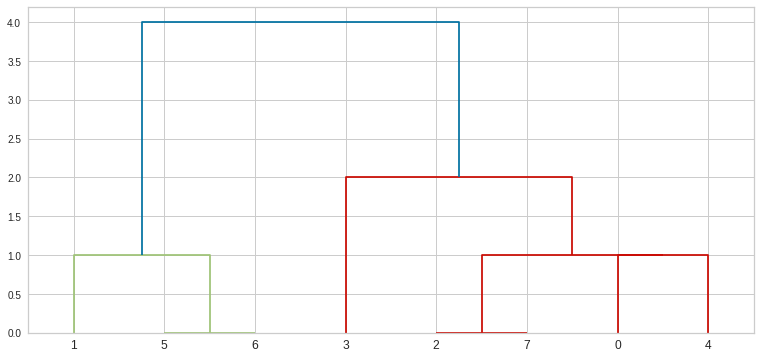

In [78]:
# linkage matrix를 통해 dendrogram을 그려보자.
fig = plt.figure(figsize = (13,6))
dn = dendrogram(sample_linkage)
plt.show()

In [81]:
# Agglomerative - dendrogram을 통해 알고리즘 이해하기
# [참고] model.children_, model.labels_, model.distances_ 를 활용
# [참고] dendrogram을 만들기 위해 어떤 형태의 데이터가 필요한지 확인하자

def create_linkage(model) :
    # 각 노드의 총 point 수 계산
    counts = np.zeros(model.children_.shape[0]) # children 길이만큼 0을 채움
    n_samples = len(model.labels_ ) # 각 point의 cluster level
    for i, merge in enumerate(model.children_) :
        current_count = 0
        for child_idx in merge :
            if child_idx < n_samples :
                current_count += 1 # leaf node
            else :
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    return linkage_matrix

In [83]:
# dendrogram을 그리기 위해서 parameter 조정이 필요함.
# distance_threshold = 0 , n_clusters =None  < None으로 해줘야 댐
aggl_dend = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(train_x)
aggl_dend

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

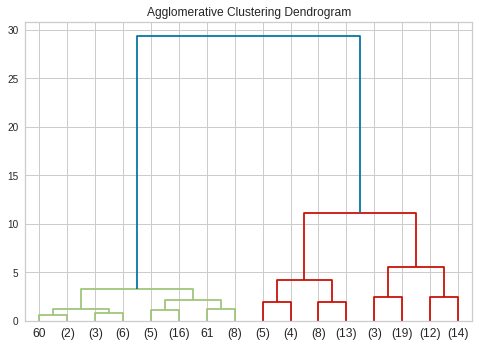

In [85]:
plt.title('Agglomerative Clustering Dendrogram')
linkage_matrix = create_linkage(aggl_dend)
dendrogram(linkage_matrix, truncate_mode = 'level', p=3)
plt.show()
# 우리는 답을 안다
# 3개로 끊을 것이다. 
# 그렇다면 5와 10사이에서 끊어줘야 함.


In [88]:
# cluster를 4로 설정한 후 해보자
aggl = AgglomerativeClustering(n_clusters = 4, linkage='ward', affinity='euclidean').fit(train_x)
aggl

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [89]:
aggl_labels = aggl.labels_
fig = make_subplots(rows =1, cols = 2, subplot_titles=('actual', 'aggl cluster'))
fig.add_trace(
    go.Scatter(x= train_x['petal_width'],
               y= train_x['petal_length'],
               mode= 'markers',
               marker = dict(color=train_y )),
              row=1, col=1 
              )
fig.add_trace(
    go.Scatter(x= train_x['petal_width'],
               y= train_x['petal_length'],
               mode= 'markers',
               marker = dict(color=aggl_labels )),
              row=1, col=2 
              )

fig.update_layout(width= 800,height = 600)
fig.show()

In [90]:
fig = make_subplots(rows =1, cols = 2, subplot_titles=('actual', 'aggl cluster'))
fig.add_trace(
    go.Scatter(x= train_x['sepal_width'],
               y= train_x['sepal_length'],
               mode= 'markers',
               marker = dict(color=train_y )),
              row=1, col=1 
              )
fig.add_trace(
    go.Scatter(x= train_x['sepal_width'],
               y= train_x['sepal_length'],
               mode= 'markers',
               marker = dict(color=aggl_labels )),
              row=1, col=2 
              )

fig.update_layout(width= 800,height = 600)
fig.show()